In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree
import pickle

In [45]:
df = pd.read_csv('cardio.csv',sep=';',index_col='id')

In [46]:
df.sample(5)

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
id                                                                             
95044  14584       1     167    69.0    110     70            1     1      0   
86422  15278       1     166    91.0    140    100            2     1      0   
25361  20274       1     156    81.0    150    100            1     1      0   
23815  17473       2     170    94.0    130     80            1     1      0   
10900  19629       1     170    67.0    110     70            2     1      0   

       alco  active  cardio  
id                           
95044     0       1       0  
86422     0       1       1  
25361     0       1       1  
23815     0       0       1  
10900     0       1       0

In [47]:
df.shape

(70000, 12)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


In [49]:
df.describe()

age        gender        height        weight         ap_hi  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   19468.865814      1.349571    164.359229     74.205690    128.817286   
std     2467.251667      0.476838      8.210126     14.395757    154.011419   
min    10798.000000      1.000000     55.000000     10.000000   -150.000000   
25%    17664.000000      1.000000    159.000000     65.000000    120.000000   
50%    19703.000000      1.000000    165.000000     72.000000    120.000000   
75%    21327.000000      2.000000    170.000000     82.000000    140.000000   
max    23713.000000      2.000000    250.000000    200.000000  16020.000000   

              ap_lo   cholesterol          gluc         smoke          alco  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean      96.630414      1.366871      1.226457      0.088129      0.053771   
std      188.472530      0.680250      0.572270      0.283484      0.225568   
min      -70.000000      1.000000      1.000000      0.000000      0.000000   
25%       80.000000      1.000000      1.000000      0.000000      0.000000   
50%       80.000000      1.000000      1.000000      0.000000      0.000000   
75%       90.000000      2.000000      1.000000      0.000000      0.000000   
max    11000.000000      3.000000      3.000000      1.000000      1.000000   

             active        cardio  
count  70000.000000  70000.000000  
mean       0.803729      0.499700  
std        0.397179      0.500003  
min        0.000000      0.000000  
25%        1.000000      0.000000  
50%        1.000000      0.000000  
75%        1.000000      1.000000  
max        1.000000      1.000000

Gender : 1 - women, 2 - men

Cholesterol 1: normal, 2: above normal, 3: well above normal

Gluc 1: normal, 2: above normal, 3: well above normal

active (Physical Activity) 0 : no, 1 : yes

ap_hi : <130 = normal(1) 130–139 = high-normal(2) 140+ = hypertension(3) 180+ = emergency(4)

ap_lo : <85 = normal(1) 85-89 = high-normal(2) 90-99 = hypertension(3) 99+ = emergency(4)

In [50]:
df['age'] = df['age'] // 365

In [51]:
df.sample(5)

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
id                                                                           
23838   56       2     171   102.0    100     60            2     3      0   
59428   56       2     174    71.0    120     80            1     1      0   
26641   52       1     155   107.0    100     60            1     1      0   
37275   58       2     183    84.0    110     80            1     1      0   
90379   57       1     157    64.0     90     60            2     1      0   

       alco  active  cardio  
id                           
23838     0       1       1  
59428     0       1       1  
26641     1       1       0  
37275     0       0       0  
90379     0       0       0

In [52]:
df['bmi'] = (df['weight'] / (df['height'] * (0.01)) ** 2)

In [53]:
df['bmi'] = np.round(df['bmi'],2)

In [54]:
df.drop(columns=['height','weight'],inplace=True)

In [55]:
df.head()

age  gender  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  active  cardio  \
id                                                                              
0    50       2    110     80            1     1      0     0       1       0   
1    55       1    140     90            3     1      0     0       1       1   
2    51       1    130     70            3     1      0     0       0       1   
3    48       2    150    100            1     1      0     0       1       1   
4    47       1    100     60            1     1      0     0       0       0   

      bmi  
id         
0   21.97  
1   34.93  
2   23.51  
3   28.71  
4   23.01

In [56]:
df.describe()

age        gender         ap_hi         ap_lo   cholesterol  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean      52.840671      1.349571    128.817286     96.630414      1.366871   
std        6.766774      0.476838    154.011419    188.472530      0.680250   
min       29.000000      1.000000   -150.000000    -70.000000      1.000000   
25%       48.000000      1.000000    120.000000     80.000000      1.000000   
50%       53.000000      1.000000    120.000000     80.000000      1.000000   
75%       58.000000      2.000000    140.000000     90.000000      2.000000   
max       64.000000      2.000000  16020.000000  11000.000000      3.000000   

               gluc         smoke          alco        active        cardio  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean       1.226457      0.088129      0.053771      0.803729      0.499700   
std        0.572270      0.283484      0.225568      0.397179      0.500003   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.000000      0.000000      0.000000      1.000000      0.000000   
50%        1.000000      0.000000      0.000000      1.000000      0.000000   
75%        1.000000      0.000000      0.000000      1.000000      1.000000   
max        3.000000      1.000000      1.000000      1.000000      1.000000   

                bmi  
count  70000.000000  
mean      27.556545  
std        6.091405  
min        3.470000  
25%       23.880000  
50%       26.375000  
75%       30.220000  
max      298.670000

Detecting and fixing outliers in age col

In [57]:
px.box(df['age'])

<Axes: xlabel='age', ylabel='Density'>

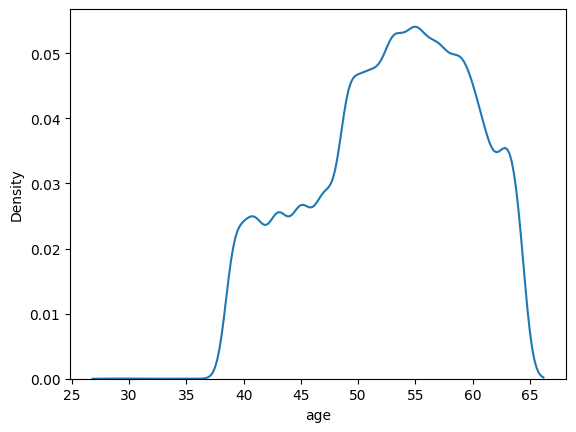

In [58]:
sns.kdeplot(df['age'])

In [59]:
df['age'] = np.where(df['age'] < 39, df['age'].mean(), df['age'])

In [60]:
px.box(df['age'])

Detecting and fixing outliers in ap_hi col

In [61]:
px.box(df['ap_hi'])

<Axes: xlabel='ap_hi', ylabel='Density'>

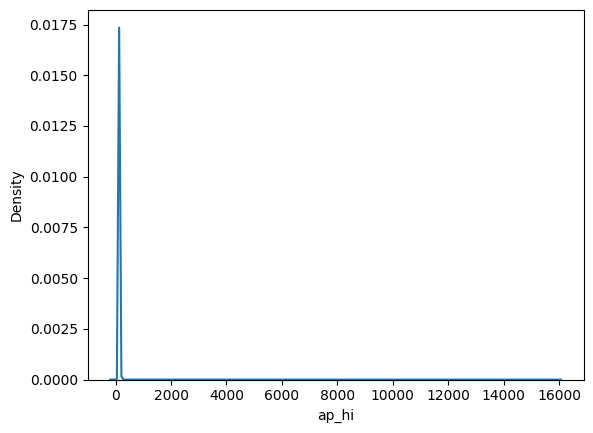

In [62]:
sns.kdeplot(df['ap_hi'])

In [63]:
df['ap_hi'].describe([0,.01,.10,.25,.50,.75,.80,.90,.95,.99])

count    70000.000000
mean       128.817286
std        154.011419
min       -150.000000
0%        -150.000000
1%          90.000000
10%        110.000000
25%        120.000000
50%        120.000000
75%        140.000000
80%        140.000000
90%        150.000000
95%        160.000000
99%        180.000000
max      16020.000000
Name: ap_hi, dtype: float64

In [64]:
df[df['ap_hi'] > 180].shape

(369, 11)

In [65]:
df = df[(df['ap_hi'] <= 220) & (df['ap_hi'] >= 50)]

In [66]:
df.shape

(69764, 11)

In [67]:
px.box(df['ap_hi'])

In [68]:
def convert_numerical_to_categorical_ap_hi(ap_hi):
    if ap_hi < 130:
        return 1 #Normal
    elif ap_hi >= 130 and ap_hi <= 139:
        return 2 #High-Normal
    elif ap_hi >= 140 and ap_hi < 180:
        return 3 #Hypertension
    elif ap_hi >= 180:
        return 4 #Emergency

In [69]:
df['ap_hi'] = df['ap_hi'].apply(convert_numerical_to_categorical_ap_hi)

In [70]:
df['ap_hi'].isnull().sum()

np.int64(0)

In [71]:
df['ap_hi'].value_counts()

ap_hi
1    41138
3    18337
2     9273
4     1016
Name: count, dtype: int64

In [72]:
df.groupby(df['ap_hi'])['cardio'].mean()*100

ap_hi
1    31.775974
2    59.883533
3    83.650543
4    87.500000
Name: cardio, dtype: float64

Detecting and fixing outliers in ap_lo col

In [73]:
px.box(df['ap_lo'])

In [74]:
df = df[(df['ap_lo'] <= 130) & (df['ap_lo'] >= 40)]

In [75]:
df.shape

(68709, 11)

In [76]:
px.box(df['ap_lo'])

In [77]:
def convert_numerical_to_categorical_ap_lo(ap_lo):
    if ap_lo < 85:
        return 1 #Normal
    elif ap_lo >= 85 and ap_lo <= 89:
        return 2 #High-Normal
    elif ap_lo >= 90 and ap_lo <= 99:
        return 3 #Hypertension
    elif ap_lo >= 99:
        return 4 #Emergency

In [78]:
df['ap_lo'] = df['ap_lo'].apply(convert_numerical_to_categorical_ap_lo)

In [79]:
df['ap_lo'].value_counts()

ap_lo
1    48868
3    14565
4     4789
2      487
Name: count, dtype: int64

In [80]:
df['ap_lo'].isnull().sum()

np.int64(0)

In [81]:
df.groupby(df['ap_lo'])['cardio'].mean()*100

ap_lo
1    38.430056
2    58.110883
3    74.974253
4    83.420338
Name: cardio, dtype: float64

In [82]:
df.sample(5)

age  gender  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  active  \
id                                                                          
98288  56.0       2      3      4            1     1      0     0       1   
46339  58.0       1      3      3            1     1      0     0       1   
97680  54.0       1      1      1            2     1      0     0       1   
21400  61.0       2      3      4            1     1      1     0       1   
59165  55.0       2      1      1            1     1      0     0       0   

       cardio    bmi  
id                    
98288       1  23.88  
46339       1  28.76  
97680       0  21.47  
21400       0  28.01  
59165       0  25.21

In [83]:
transform_cols = ['age','bmi']
transformer = ColumnTransformer(
    transformers=[
        ('trf_age',MinMaxScaler(),transform_cols)
    ],
    remainder='passthrough'
)

In [84]:
X = df.drop(columns=['cardio'])
y = df['cardio']

In [85]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [86]:
X_train

age  gender  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  active  \
id                                                                          
83233  44.0       2      1      1            1     1      0     0       1   
52507  59.0       2      3      1            1     1      0     0       1   
98284  46.0       1      1      1            1     1      0     0       1   
72218  59.0       2      1      1            2     1      1     0       1   
44038  45.0       1      1      1            2     2      0     0       0   
...     ...     ...    ...    ...          ...   ...    ...   ...     ...   
54097  56.0       1      1      1            1     1      0     0       1   
9095   46.0       2      1      3            1     1      1     1       0   
79754  41.0       1      2      1            1     1      0     0       1   
1216   54.0       1      1      1            1     3      0     0       1   
22974  59.0       1      1      1            1     1      0     0       1   

         bmi  
id            
83233  33.26  
52507  23.44  
98284  21.30  
72218  26.03  
44038  24.44  
...      ...  
54097  25.71  
9095   20.20  
79754  17.22  
1216   27.55  
22974  24.22  

[48096 rows x 10 columns]

In [87]:
X_train_trf = transformer.fit_transform(X_train)
X_test_trf = transformer.transform(X_test)

In [88]:
classifier = DecisionTreeClassifier()

In [89]:
classifier.fit(X_train_trf,y_train)

DecisionTreeClassifier()

In [90]:
y_pred = classifier.predict(X_test_trf)

In [91]:
accuracy_score(y_test,y_pred)

0.6483772376655509

In [92]:
param_grid = {
    'criterion':['gini','entropy'],
    'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]
}   

In [93]:
cv = GridSearchCV(DecisionTreeClassifier(),param_grid=param_grid,cv=10,scoring='accuracy')

In [94]:
cv.fit(X_train_trf,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150]},
             scoring='accuracy')

In [95]:
y_pred = cv.predict(X_test_trf)

In [96]:
accuracy_score(y_test,y_pred)

0.7311405423761704

In [97]:
with open('model.pickle', 'wb') as file:
    pickle.dump(cv, file)